In [1]:
import pandas as pd
import numpy as np
import html
import re
import nltk
import time
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/feiwang/anaconda3/envs/py36er/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
raw_dict=pd.read_pickle('vic_pettion_info_dict0-1990.pk')
raw_dict.update(pd.read_pickle('vic_pettion_info_dict0-3680_400.pk'))
df=pd.DataFrame.from_dict(raw_dict,orient='index')
df.reset_index(inplace=True)
df.columns=['Petition_Url',"Title","Text","No_Supporters","progression","start"]
df.start[df.start.str.len() == 0] = 'None\nNone'
df.start = df.start.str.split('\n')
df[['start_time', 'start_individual']] =  pd.DataFrame([x for x in df.start])
df.head(1)


def str2float(s):
    s = str(s).strip().replace(',','')
    s = re.sub('[^0-9]+', '0', s)
    return float(s)
df.No_Supporters=df.No_Supporters.apply(str2float)
df['No_Supporters_log']=np.log10(df.No_Supporters)

In [3]:
df['N>1000']=df.No_Supporters>1000
df['N>10000']=df.No_Supporters>10000
df['N>50000']=df.No_Supporters>50000
df['N>100000']=df.No_Supporters>100000

In [4]:
def remove_sw(words, sw):
    word = [w for w in words if not w in sw]
    return word
    
def clean_text( col):
    letters_only=(col.apply(lambda x:re.sub(u"\xa0",u" ",x))
    .apply(lambda x: BeautifulSoup(x).get_text())
    .apply(lambda x:re.sub("[^a-zA-Z]"," ",x))
             )
    lower_case=letters_only.apply(lambda x: x.lower().split())
    from nltk.corpus import stopwords # Import the stop word list
    stopwords=set(stopwords.words("english"))
    clean_texts = []
    num_texts = col.size
    for i in range( 0, num_texts ):
    # Call our function for each one, and add the result to the list of
    # clean 
        clean_texts.append( " ".join(remove_sw(lower_case[i],stopwords)))
    return clean_texts
    

In [ ]:
df.Text=clean_text(df.Text)
df.Title=clean_text(df.Title)

In [6]:
df['Text_len']=df.Text.str.split(' ').apply(lambda x: len(x))
df['Title_len']=df.Title.str.split(' ').apply(lambda x: len(x))

In [7]:
df['Text_str_len']=df.Text.str.split(' ').apply(lambda x: sum(len(w) for w in x)/ len(x))
df['Title_str_len']=df.Title.str.split(' ').apply(lambda x: sum(len(w) for w in x)/ len(x))


In [8]:
df['Text_len_p1']=(df['Text_len']<270)*df['Text_len']
df['Text_len_p2']=(df['Text_len']>270)*df['Text_len']

In [151]:
#len(df.progression[df.progression.str.len() == 0])

292

In [10]:
df.head(5)

,Petition_Url,Title,Text,No_Supporters,progression,start,start_time,start_individual,No_Supporters_log,N>1000,N>10000,N>50000,N>100000,Text_len,Title_len,Text_str_len,Title_str_len
0,https://www.change.org/p/trimble-navigations-b...,bring back reviews trimble warehouse,tl dr reviews vital part warehouse excuses lam...,160.0,[2 years ago\n10 supporters],"[2 years ago, Maxim Kraft started this petition]",2 years ago,Maxim Kraft started this petition,2.204120,False,False,False,False,234,5,6.064103,6.400000
1,https://www.change.org/p/gov-andrew-cuomo-plea...,please sign new york state assembly bill senat...,ostomy surgically created opening abdomen elim...,7780.0,"[3 years ago\n750 supporters, 3 years ago\n500...","[4 years ago, Heidi Cross started this petition]",4 years ago,Heidi Cross started this petition,3.890980,True,False,False,False,34,14,6.676471,5.571429
2,https://www.change.org/p/educational-testing-s...,educational testing service provide detailed e...,gre toefl testing critical enabling nigerians ...,3530.0,[4 years ago\n250 supporters],"[4 years ago, Chidube Ezeozue started this pet...",4 years ago,Chidube Ezeozue started this petition,3.547775,True,False,False,False,136,19,6.808824,6.894737
3,https://www.change.org/p/victimservices-pap-st...,savage beating wife randi robinson,jan randi violently attacked husband time took...,20140.0,"[3 years ago\n2,000 supporters]","[3 years ago, michael flynn started this petit...",3 years ago,michael flynn started this petition,4.304059,True,True,False,False,49,5,6.102041,6.000000
4,https://www.change.org/p/triple-canopy-inc-to-...,provide medical treatment salary compensation,christopher kubiak inured kuwait may performin...,120.0,"[5 years ago\n10 supporters, 5 years ago\n5 su...","[5 years ago, Christopher Kubiak started this ...",5 years ago,Christopher Kubiak started this petition,2.079181,False,False,False,False,45,5,6.533333,8.200000


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 12 columns):
Petition_Url        3680 non-null object
Title               3680 non-null object
Text                3680 non-null object
No_Supporters       3680 non-null float64
progression         3680 non-null object
start               3680 non-null object
start_time          3680 non-null object
start_individual    3680 non-null object
N>1000              3680 non-null bool
N>10000             3680 non-null bool
N>50000             3680 non-null bool
N>100000            3680 non-null bool
dtypes: bool(4), float64(1), object(7)
memory usage: 244.5+ KB


In [313]:
df.columns

Index(['Petition_Url', 'Title', 'Text', 'No_Supporters', 'progression',
       'start', 'start_time', 'start_individual', 'No_Supporters_log',
       'N>1000', 'N>10000', 'N>50000', 'N>100000', 'Text_len', 'Title_len',
       'Text_str_len', 'Title_str_len', 'Text_len_p1', 'Text_len_p2'],
      dtype='object')

## detecting the none-linear relationship of Text length


In [317]:
corr=df[ [ 'No_Supporters_log', 'Text_len', 'Title_len',
       'Text_str_len', 'Title_str_len']].corr(); corr

,No_Supporters_log,Text_len,Title_len,Text_str_len,Title_str_len
No_Supporters_log,1.000000,0.161212,-0.011437,-0.038343,-0.044134
Text_len,0.161212,1.000000,0.082032,0.003514,0.059127
Title_len,-0.011437,0.082032,1.000000,0.045496,0.018139
Text_str_len,-0.038343,0.003514,0.045496,1.000000,0.375447
Title_str_len,-0.044134,0.059127,0.018139,0.375447,1.000000


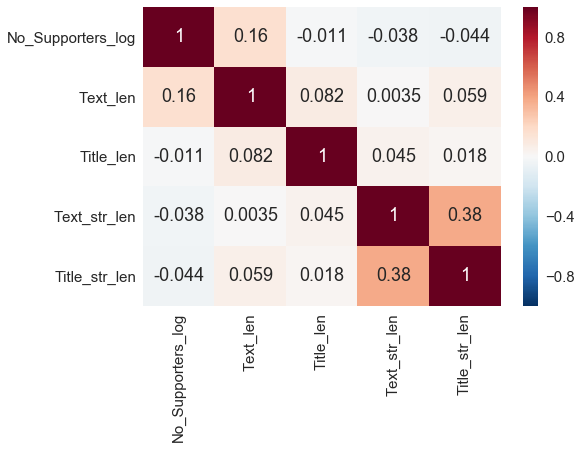

In [321]:
sns.set(font_scale=1.5) 
#ax = sns.heatmap(corr, annot=True)

In [326]:
corr1=df.loc[df.Text_len<270, [ 'No_Supporters_log', 'Text_len', 'Title_len',
       'Text_str_len', 'Title_str_len']].corr(); corr1

,No_Supporters_log,Text_len,Title_len,Text_str_len,Title_str_len
No_Supporters_log,1.000000,0.307577,-0.005711,-0.035387,-0.051042
Text_len,0.307577,1.000000,0.044336,0.015031,0.046897
Title_len,-0.005711,0.044336,1.000000,0.052285,0.018039
Text_str_len,-0.035387,0.015031,0.052285,1.000000,0.380748
Title_str_len,-0.051042,0.046897,0.018039,0.380748,1.000000


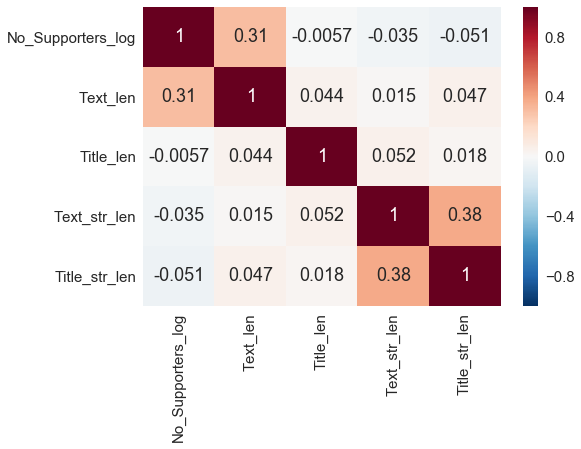

In [327]:
ax = sns.heatmap(corr1, annot=True)

In [274]:
df.corr()

,No_Supporters,No_Supporters_log,N>1000,N>10000,N>50000,N>100000,Text_len,Title_len,Text_str_len,Title_str_len,Text_len_p1,Text_len_p2
No_Supporters,1.000000,0.495124,0.105401,0.276151,0.448414,0.509607,0.066931,-0.002748,-0.041855,-0.019646,0.126196,0.001294
No_Supporters_log,0.495124,1.000000,0.614689,0.791610,0.769852,0.742824,0.161212,-0.011437,-0.038343,-0.044134,0.205348,0.048795
N>1000,0.105401,0.614689,1.000000,0.375716,0.224012,0.193255,0.098901,0.020016,0.005844,-0.022156,0.091518,0.048294
N>10000,0.276151,0.791610,0.375716,1.000000,0.596227,0.514364,0.136169,-0.040364,-0.037814,-0.036005,0.170438,0.043635
N>50000,0.448414,0.769852,0.224012,0.596227,1.000000,0.862699,0.116136,-0.037636,-0.055113,-0.034853,0.187458,0.015326
N>100000,0.509607,0.742824,0.193255,0.514364,0.862699,1.000000,0.123776,-0.022965,-0.048360,-0.042613,0.188468,0.022328
Text_len,0.066931,0.161212,0.098901,0.136169,0.116136,0.123776,1.000000,0.082032,0.003514,0.059127,0.018689,0.883079
Title_len,-0.002748,-0.011437,0.020016,-0.040364,-0.037636,-0.022965,0.082032,1.000000,0.045496,0.018139,-0.005207,0.069350
Text_str_len,-0.041855,-0.038343,0.005844,-0.037814,-0.055113,-0.048360,0.003514,0.045496,1.000000,0.375447,0.008159,-0.001856
Title_str_len,-0.019646,-0.044134,-0.022156,-0.036005,-0.034853,-0.042613,0.059127,0.018139,0.375447,1.000000,0.011935,0.045046


[<matplotlib.text.Text at 0x12b2c4128>, <matplotlib.text.Text at 0x12b12e6a0>]

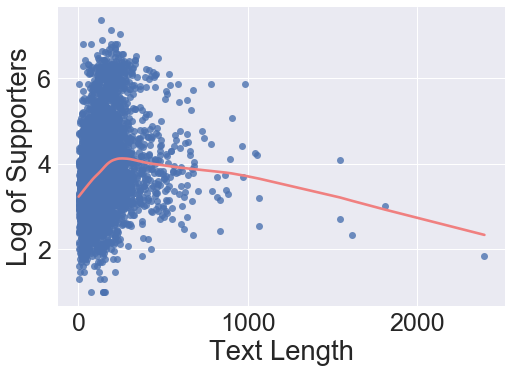

In [397]:

fig=sns.regplot(x='Text_len', y='No_Supporters_log',data=df[df.Text_len<3000],
            lowess=True,line_kws={"color":"lightcoral"})
fig.set(xlabel='Text Length',ylabel='Log of Supporters')

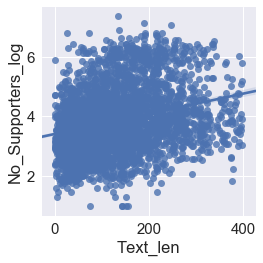

In [324]:
sns.lmplot(x='Text_len', y='No_Supporters_log',data=df[df.Text_len<400], size=4)

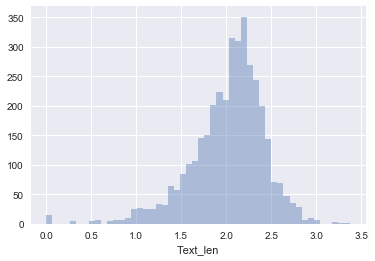

In [153]:
sns.distplot(np.log10(df.Text_len),kde=False)

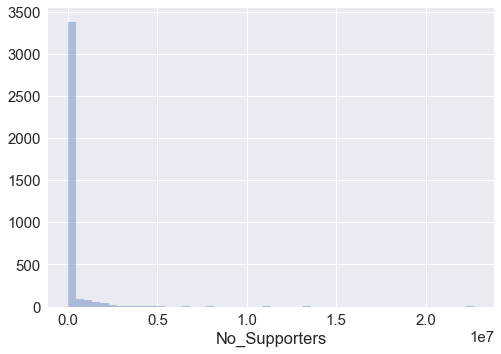

In [363]:
sns.distplot(df.No_Supporters,kde=False)

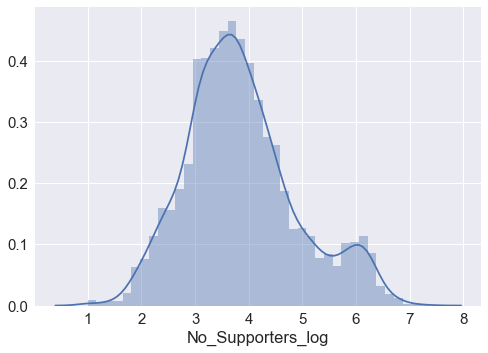

In [364]:
sns.distplot(df.No_Supporters_log)

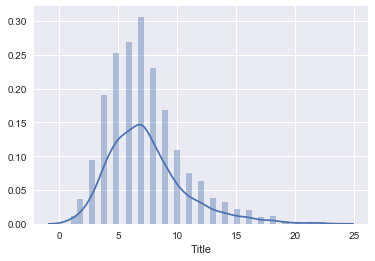

In [142]:
sns.distplot(df.Title_len)

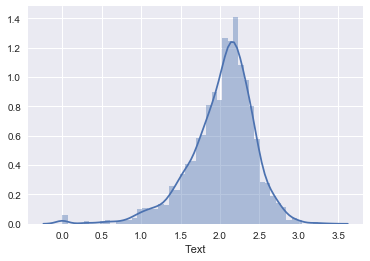

In [144]:
sns.distplot(np.log10(df.Text_len))

In [155]:
df.columns

Index(['Petition_Url', 'Title', 'Text', 'No_Supporters', 'progression',
       'start', 'start_time', 'start_individual', 'N>1000', 'N>10000',
       'N>50000', 'N>100000', 'Text_len', 'Title_len', 'Text_str_len',
       'No_Supporters_log'],
      dtype='object')

## split training testing data

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
x, y = (df[['Title', 'Text','Title_str_len' ,
       'start_time', 'Text_len_p1','Text_len_p2', 'Title_len', 'Text_str_len']], 
         df.No_Supporters_log)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)

In [167]:
len(x_train)

2760

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

text_court_vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,
                             ngram_range=(1, 2),
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 2500) 

In [17]:

train_text_features = text_court_vectorizer.fit_transform(x_train.Text)
train_text_features = train_text_features.toarray()
import pickle
pickle.dump(text_court_vectorizer,open('text_court_vectorizer.pickle','wb'))

In [18]:
title_court_vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,
                             ngram_range=(1, 3),
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 2500) 

In [19]:
train_title_features = title_court_vectorizer.fit_transform(x_train.Title)
train_title_features = train_title_features.toarray()

import pickle
pickle.dump(title_court_vectorizer,open('title_court_vectorizer.pickle','wb'))

In [182]:
train_title_features.shape

(2760, 2500)

## t-SNE feature space

In [17]:
import numpy as np
from sklearn.manifold import TSNE

# model_tSNE_text = TSNE(n_components=2, random_state=0)
# np.set_printoptions(suppress=True)
# train_tSNE_text=model_tSNE_text.fit_transform(train_text_features)


# model_tSNE_title = TSNE(n_components=2, random_state=0)
# np.set_printoptions(suppress=True)
# train_tSNE_title=model_tSNE_title.fit_transform(train_title_features)


## Vetorize the text and title

In [25]:
from sklearn.preprocessing import StandardScaler
#model_tSNE_all = TSNE(n_components=2, random_state=0)
selected_variable=['Title_str_len', 'Text_len_p1', 'Text_len_p2',
                                      'Title_len', 'Text_str_len']
total_scale_train=StandardScaler().fit(np.concatenate((train_text_features,
                                                     train_title_features,x_train[selected_variable]),axis=1))

total_train_scale=total_scale_train.transform(np.concatenate((train_text_features,
                                                     train_title_features,x_train[selected_variable]),axis=1))


total_test_scale=total_scale_train.transform(np.concatenate((test_text_features,
                                                             test_title_features, 
                                                x_test[selected_variable]),axis=1))

from sklearn.decomposition import PCA
train_pca=PCA(n_components=1500,svd_solver='full')

x_train_pca=train_pca.fit_transform(total_train_scale)

x_test_pca=train_pca.transform(total_test_scale)




#test_all_features: centered test features on the train mean
# train_all_features.shape
# np.set_printoptions(suppress=True)
#train_tSNE_all=model_tSNE_all.fit_transform(train_all_features)



In [269]:
import pickle
pickle.dump(total_scale_train,open('total_scale_train.pickle','wb'))
pickle.dump(train_pca,open('train_pca.pickle','wb'))

## PCA and regression

In [185]:
from sklearn.decomposition import PCA

var= train_all_pca.explained_variance_ratio_
cum_var=np.cumsum(np.round(var, decimals=4)*100)



In [186]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression

n = len(x_train_pca)
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=2)
regr = LinearRegression()
mse = []

In [200]:
x_train_pca.shape

(2760, 1500)

In [189]:
score = -1*cross_validation.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='mean_squared_error').mean()    
mse.append(score) 

In [191]:
for i in range(1,10):
    score = -1*cross_validation.cross_val_score(regr, x_train_pca[:,:2**i], y_train.ravel(), cv=kf_10, scoring='mean_squared_error').mean()
    mse.append(score)


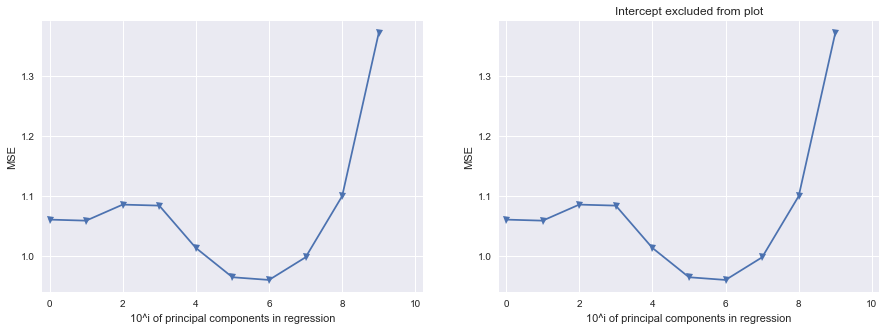

In [194]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax1.plot(mse, '-v')
ax2.plot([0,1,2,3,4,5,6,7,8,9], mse[0:10], '-v')
ax2.set_title('Intercept excluded from plot')

for ax in fig.axes:
    ax.set_xlabel('10^i of principal components in regression')
    ax.set_ylabel('MSE')
    ax.set_xlim((-0.2,10.2))

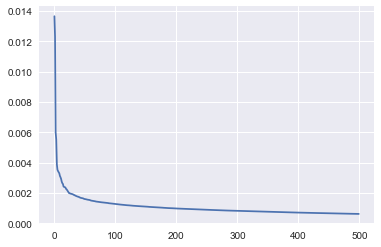

In [35]:
plt.plot(var[0:500])

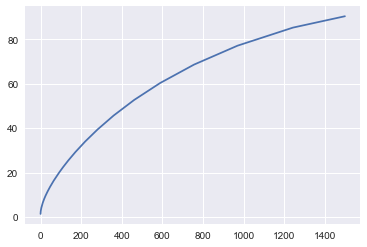

In [31]:
plt.plot(cum_var)

## Tuning for PCA+ Elasticnet

In [27]:
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [28]:
Elastic = linear_model.ElasticNet()
pca = decomposition.PCA()
pipe = Pipeline(steps=[
    ('pca', pca), 
                       ('Elastic', Elastic)])

n_components = [ 60,100,500, 1000,]
alphas = np.logspace(-4, 4, 4)
l1_ratio=(0.4,0.6,0.7,0.8,1)

estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              Elastic__alpha=alphas,Elastic__l1_ratio=l1_ratio))



In [29]:

estimator.fit(x_train_pca, y_train)


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('Elastic', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'pca__n_components': [60, 100, 500, 1000], 'Elastic__alpha': array([  1.00000e-04,   4.64159e-02,   2.15443e+01,   1.00000e+04]), 'Elastic__l1_ratio': (0.4, 0.6, 0.7, 0.8, 1)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [30]:
estimator.best_estimator_.named_steps['pca'].n_components

500

In [31]:
estimator.best_estimator_.named_steps['Elastic'].alpha

0.046415888336127774

In [32]:
estimator.best_estimator_.named_steps['Elastic'].l1_ratio


0.4

In [33]:
Elastic=linear_model.ElasticNet(alpha=0.046415888336127774, 
                    l1_ratio=0.4, fit_intercept=True, 
            normalize=False, precompute=False, max_iter=1000, 
           copy_X=True, tol=0.0001, warm_start=False, positive=False, 
           random_state=None, selection='cyclic')

In [34]:
train_Elastic=Elastic.fit(x_train_pca[:,0:500],y_train)

In [267]:
import pickle
pickle.dump(train_Elastic,open('train_Elastic.pickle','wb'))

In [37]:
train_predict=train_Elastic.predict(x_train_pca[:,0:500])

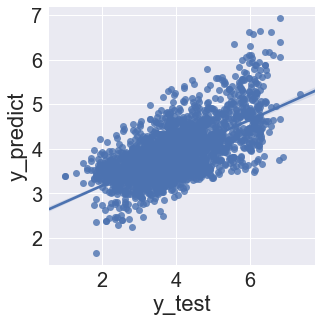

In [40]:
sns.set(font_scale=2) 
fig1=sns.lmplot(x="x",y="y",data=pd.DataFrame({'x':y_test,"y":test_predict}))
fig1.set(xlabel="y_test",ylabel="y_predict")

In [264]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, train_predict)

0.58556990457499225

### testing data on pca+ elastic

In [135]:
# x_test_pca=train_all_pca.transform(test_all_features)
# x_test_pca.shape

(920, 1500)

In [265]:
test_predict=train_Elastic.predict(x_test_pca[:,0:500])


In [305]:
len(y_test.tolist())
    

920

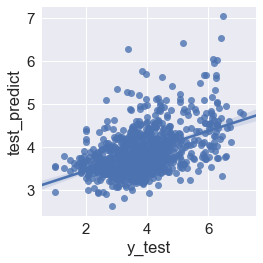

In [362]:
sns.lmplot(x='y_test', y='test_predict', data=pd.DataFrame({"y_test":y_test.tolist(),"test_predict":list(test_predict)}), size=4)

## Walmart petition has the max predicted signiture

In [291]:
x_test.loc[test_predict.argmax()]

Title            tell walmart stop torturing mother pigs sign j...
Text             hi joaquin phoenix need help serious issue end...
Title_str_len                                                    6
start_time                                             3 years ago
Text_len_p1                                                    234
Text_len_p2                                                      0
Title_len                                                       10
Text_str_len                                               6.14103
Name: 1506, dtype: object

In [144]:
MSE_test=mean_squared_error(y_test, test_predict)

In [294]:
from sklearn.metrics import r2_score
r2_score(y_test, test_predict)

0.21388292129771513

In [143]:
print(mean(test_predict), mean(y_test))

3.86160401067 3.84426372597


In [281]:
ymax=mlab.normpdf(vertical_line, mu, variance ** (1/2));ymax

0.2771070941008153

### plot with plotly

In [178]:
import plotly
import plotly.graph_objs as go
import plotly.plotly as py

import numpy as np

trace1 = go.Scatter(
    x = train_tSNE_text[:,0],
    y = train_tSNE_text[:,1],
    mode='markers',
    marker=dict(
        size='6',
        color = y_train , #set color equal to a variable
        colorscale='Viridis',
        showscale=True
    )
)
data = [trace1]

py.iplot(data, filename='scatter-plot-with-colorscale')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~cherry8177/0 or inside your plot.ly account where it is named 'scatter-plot-with-colorscale'


In [180]:
trace_title = go.Scatter(
    x = train_tSNE_title[:,0],
    y = train_tSNE_title[:,1],
    mode='markers',
    marker=dict(
        size='6',
        color = y_train , #set color equal to a variable
        colorscale='Viridis',
        showscale=True
    )
)
data_title = [trace_title]

py.iplot(data_title, filename='scatter-plot-with-colorscale')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~cherry8177/0 or inside your plot.ly account where it is named 'scatter-plot-with-colorscale'


### text+title

In [188]:
trace_all = go.Scatter(
    x = train_tSNE_all[:,0],
    y = train_tSNE_all[:,1],
    mode='markers',
    marker=dict(
        size='6',
        color = y_train , #set color equal to a variable
        colorscale='Viridis',
        showscale=True
    )
)
data_all = [trace_all]

py.iplot(data_title, filename='scatter-plot-with-colorscale')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~cherry8177/0 or inside your plot.ly account where it is named 'scatter-plot-with-colorscale'


In [196]:
trace_all = go.Scatter(
    x = train_tSNE_all[:,0],
    y = train_tSNE_all[:,1],
    mode='markers',
    marker=dict(
        size='6',
        color = y_train , #set color equal to a variable
        colorscale='Viridis',
        showscale=True
    )
)
data_all = [trace_all]

py.iplot(data_title, filename='scatter-plot-with-colorscale')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~cherry8177/0 or inside your plot.ly account where it is named 'scatter-plot-with-colorscale'


## logistic regression

In [365]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression(penalty='l2', dual=False, tol=0.0005, C=1, fit_intercept=True,
                         intercept_scaling=1, class_weight=None, random_state=None, 
                         solver='liblinear', max_iter=100, multi_class='ovr',
                         verbose=0, warm_start=False, n_jobs=1)
logitReg_all=logit.fit(x_train_pca[:,0:500],y_train>5 )

### training error

In [341]:
train_predict_logit=logitReg_all.predict(train_all_features)

In [342]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train>4.5, train_predict_logit, labels=None, sample_weight=None)

array([[2131,    0],
       [   2,  627]])

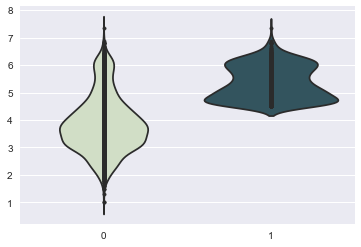

In [221]:
train_all_data=[y_train,y_train[train_predict_logit]]
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)

# Show each distribution with both violins and points
sns.violinplot(data=train_all_data, palette=pal, inner="points")

### testing data run

transform the text to features

In [22]:
test_text_features = text_court_vectorizer.transform(x_test.Text)
test_text_features = test_text_features.toarray()

In [23]:
test_title_features = title_court_vectorizer.transform(x_test.Title)
test_title_features = test_title_features.toarray()

In [ ]:
test_all_features=std_scale_train.transform(np.concatenate((test_text_features,test_title_features,
                                  x_test[['Title_str_len', 'Text_len', 
                                      'Title_len', 'Text_str_len']]),axis=1))

#X_test_std = std_scale.transform(X_test)
test_all_features.shape

In [366]:
test_predict_logit=logitReg_all.predict(x_test_pca[:,0:500])

sum(test_predict_logit)
sum(y_test>5)

126

In [335]:
test_predict_prob=logitReg_all.predict_proba(test_all_features)
test_predict_prob



array([[ 0.87390714,  0.12609286],
       [ 0.01915695,  0.98084305],
       [ 0.99635651,  0.00364349],
       ..., 
       [ 0.99989575,  0.00010425],
       [ 0.99606659,  0.00393341],
       [ 0.99993998,  0.00006002]])

In [367]:
from sklearn.metrics import confusion_matrix
logit_confu=confusion_matrix(y_test>5,
                             test_predict_logit, labels=None, sample_weight=None)
logit_confu

array([[768,  26],
       [ 91,  35]])

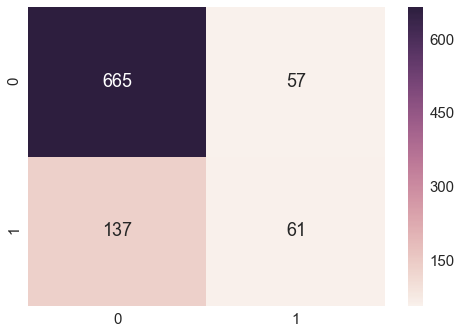

In [356]:
sns.heatmap(logit_confu, annot=True,fmt="d")

In [384]:
(61+665)/len(y_test)

0.7891304347826087

In [361]:
33/(33+24)

0.5789473684210527

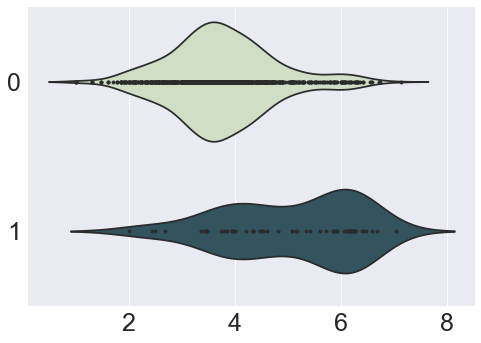

In [385]:
test_all_data=[y_test[test_predict_logit==False],y_test[test_predict_logit]]
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)
sns.set(font_scale=2.5) 
# Show each distribution with both violins and points
sns.violinplot(data=test_all_data, palette=pal, inner="points",orient="h")



In [401]:
var(y_test)

1.1296647191872555

In [ ]:
test_errors={"Variance":1.22 "PCA": 0.89,"Enriched PCA":0.78
    
}

